# This is a level 1 heading

## This is a level 2 heading

This is some plain text that forms a paragraph. Add emphasis via **bold** and __bold__, or *italic* and _italic_. 

Paragraphs must be separated by an empty line. 

* Sometimes we want to include lists. 
* Which can be bulleted using asterisks. 

1. Lists can also be numbered. 
2. If we want an ordered list.

[It is possible to include hyperlinks](https://www.example.com)

Inline code uses single backticks: foo(), and code blocks use triple backticks: 
```
bar()
``` 
Or can be indented by 4 spaces: 

    foo()

And finally, adding images is easy: ![Alt text](https://www.example.com/image.jpg)

In [2]:
import numpy as np
import scipy as sp
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
import ipywidgets as widgets

import random
import math

import itertools

In [3]:
df = pd.read_csv('fortune500.csv', sep=';')

In [3]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
a = df.head()
b = df.tail()
print(a)
print(b)


   year  rank           company  revenue profit
0  1955     1    General Motors   9823.5    806
1  1955     2       Exxon Mobil   5661.4  584.8
2  1955     3        U.S. Steel   3250.4  195.4
3  1955     4  General Electric   2959.1  212.6
4  1955     5            Esmark   2510.8   19.1
       year  rank                company  revenue profit
25495  2005   496        Wm. Wrigley Jr.   3648.6    493
25496  2005   497         Peabody Energy   3631.6  175.4
25497  2005   498  Wendy's International   3630.4   57.8
25498  2005   499     Kindred Healthcare   3616.6   70.6
25499  2005   500   Cincinnati Financial   3614.0    584


In [4]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
type(non_numberic_profits) # pandas.core.series.Series
df.loc[non_numberic_profits].head() #pandas.core.frame.DataFrame head - first five, tail - last five

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [5]:
set(df.profit[non_numberic_profits]) #you can convert Series to set, list and other normal type

{'N.A.'}

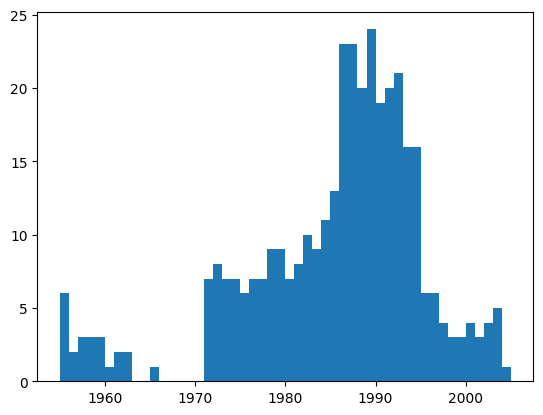

In [6]:
(bin_size, _, _) = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

<class 'pandas.core.frame.DataFrame'>


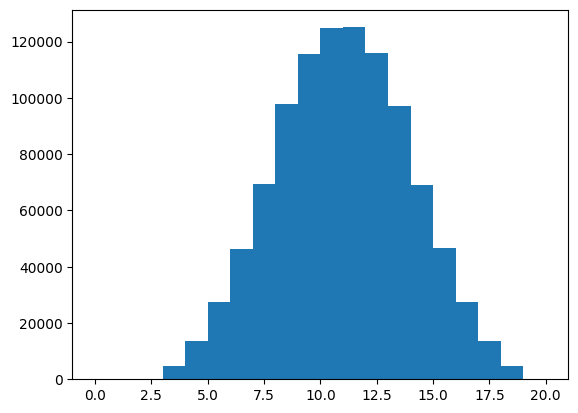

In [11]:

n = 100000
sums = np.zeros(n, dtype=int)
cubes = []

for i in range(0, 3):
    cubes.append([random.randint(1, 6) for i in range(0,n)])

for i in range(3):
    sums += cubes[i]
res = np.zeros(100)
for i in range(n):
    res[sums[i]] += 1
plt.hist(sums, bins=range(0,21), label=['x', 'y'])
data = np.random.normal(170, 10, 250)
# _,_,_ = plt.hist(z, bins=range(0,21))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
244


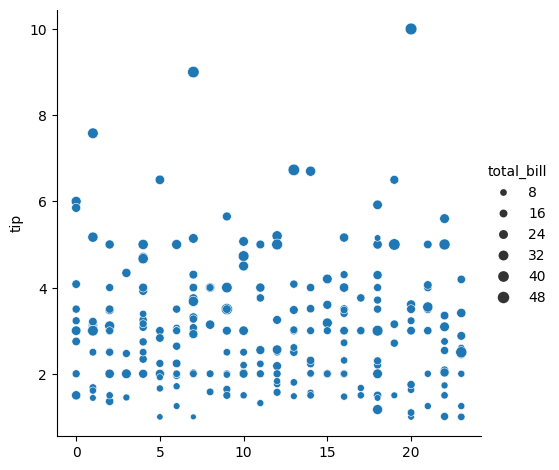

In [20]:
tips = sns.load_dataset("tips")
print(tips.loc[...].head())
print(len(tips))
k = [np.random.randint(0, 24) for i in range(0, 244)]
av = tips.loc[:]
sns.relplot(data=tips, x=k, y="tip", size="total_bill")
#type(df.profit)

6.7141237347187
6.372763782402336


C:\Users\TorchPochmak\AppData\Local\Temp\ipykernel_15448\4246333570.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_man['vals'] = vals


,total_bill,tip,sex,smoker,day,time,size,vals
172,7.25,5.15,Male,Yes,Sun,Dinner,2,1.407767
232,11.61,3.39,Male,No,Sat,Dinner,2,3.424779
183,23.17,6.50,Male,Yes,Sun,Dinner,4,3.564615
149,7.51,2.00,Male,No,Thur,Lunch,2,3.755000
181,23.33,5.65,Male,Yes,Sun,Dinner,2,4.129204


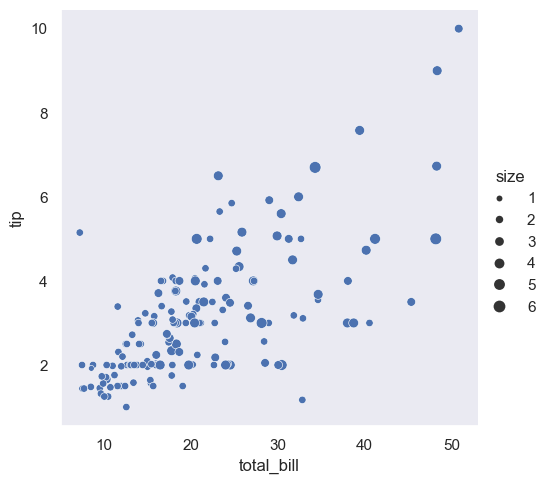

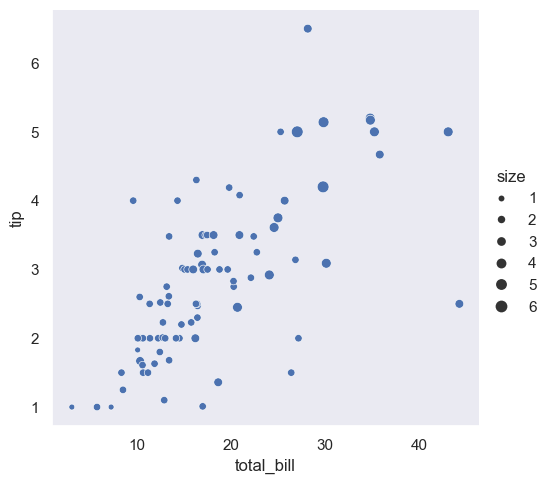

In [51]:
sns.set_theme(style='dark')
tips_man = tips[tips["sex"] == "Male"]
tips_man.head()
sns.relplot(data=tips_man, x="total_bill", y="tip", size="size")
tips_woman = tips[tips["sex"] == "Female"]
sns.relplot(data=tips_woman, x="total_bill", y="tip", size="size")
print(np.sum(tips_man["total_bill"])/ np.sum(tips_man["tip"]))
print(np.sum(tips_woman["total_bill"])/ np.sum(tips_woman["tip"]))

tips_man['total_bill']

vals = [tips_man['total_bill'].tolist()[i] / tips_man['tip'].tolist()[i] for i in range(0, len(tips_man))]
tips_man['vals'] = vals
tips_man.sort_values(  by="vals"   ).head()